In [1]:
# Import necessary libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection & Preprocessing

In [2]:
# loading dataset
data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and column
data.shape

(768, 9)

In [5]:
# getting the statistical measures of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Splitting the data

In [6]:
# deciding feature and target variable for model

features = data.drop(columns = 'Outcome', axis = 1)
target = data['Outcome']

In [7]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [9]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
# Unit variance means dividing all the values by the standard deviation.

# creating object for standardscalar 
scaler = StandardScaler()

In [10]:
# This method calculates the mean and the standard deviation to use later for scaling the data.

scaler.fit(features)

StandardScaler()

In [11]:
# This method fits the parameters of the data and then transforms it.

standardized_data = scaler.transform(features)

In [12]:
# Assigning this standardized_data to features 

features = standardized_data

In [13]:
features, target

(array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
         -0.47378505, -0.87137393]]),
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64)

# Train Test Split

In [14]:
# Splitting data into traindata and testdata 
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)

print(" features shape : ",features.shape)
print(" X_train shape : ",X_train.shape)
print(" X_test shape : ",X_test.shape)

 features shape :  (768, 8)
 X_train shape :  (614, 8)
 X_test shape :  (154, 8)


Training the Model

# LogisticRegression

In [15]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

In [16]:
# Create an instance of the LogisticRegression
classifier =  LogisticRegression()

# Train the LogisticRegression on the training data
classifier.fit(X_train, Y_train)

# Evaluate the LogisticRegression on the test data
X_test_prediction = classifier.predict(X_test)

# Calculate accuracy for the LogisticRegression
logistic_acc = accuracy_score(Y_test, X_test_prediction)

# Display accuracy for Logistic regression
print('Logistic Regression Accuracy: ', logistic_acc)

Logistic Regression Accuracy:  0.7662337662337663


# Support Vector Machine Classifier

In [17]:
# Import necessary libraries
from sklearn import svm

In [18]:
# Create an instance of the SVC
model = svm.SVC()

# Train the SVC on the training data
model.fit(X_train, Y_train)

# Evaluate the SVC on the test data
predicted_Y = model.predict(X_test)

# Calculate accuracy for the SVC
svm_acc = accuracy_score(Y_test, predicted_Y)

# Display accuracy for the SVC
print('SVC Accuracy : ',svm_acc)

SVC Accuracy :  0.7402597402597403


# DecisionTree

In [19]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Create an instance of the Decision Tree classifier
decision = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
decision.fit(X_train, Y_train)
# Evaluate the Decision Tree classifier on the test data
decision_prediction = decision.predict(X_test)

# Calculate accuracy for the Decision Tree classifier
decision_tree_acc = accuracy_score(Y_test, decision_prediction)

# Display accuracy for the Decision Tree classifier
print("Decision Tree Accuracy:", decision_tree_acc)

Decision Tree Accuracy: 0.7272727272727273


#  K nearest neighbors

In [21]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Create an instance of the KNN classifier with a specific number of neighbors (e.g., 3)
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Evaluate the KNN classifier on the test data
knn_test_data_prediction = knn_classifier.predict(X_test)

# Calculate accuracy for the KNN classifier
knn_acc = accuracy_score(Y_test, knn_test_data_prediction)

# Display accuracy for the KNN classifier
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.7662337662337663


# Naive bayes

In [23]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB

In [24]:
# Create an instance of the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the Naive Bayes classifier on the training data
naive_bayes_classifier.fit(X_train, Y_train)

# Evaluate the Naive Bayes classifier on the test data
naive_bayes_test_data_prediction = naive_bayes_classifier.predict(X_test)

# Calculate accuracy for the Naive Bayes classifier
naive_bayes_acc = accuracy_score(Y_test, naive_bayes_test_data_prediction)

# Display accuracy for the Naive Bayes classifier
print("Naive Bayes Accuracy:", naive_bayes_acc)

Naive Bayes Accuracy: 0.7597402597402597


# RandomForest

In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Create an instance of the Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Train the Random Forest classifier on the training data
random_forest_classifier.fit(X_train, Y_train)

# Evaluate the Random Forest classifier on the test data
random_forest_test_data_prediction = random_forest_classifier.predict(X_test)

# Calculate accuracy for the Random Forest classifier
random_forest_acc = accuracy_score(Y_test, random_forest_test_data_prediction)

# Display accuracy for the Random Forest classifier
print("Random Forest Accuracy:", random_forest_acc)

Random Forest Accuracy: 0.7207792207792207


# COMPARING ACCURACY OF DIFFRENT MODELS

<Axes: >

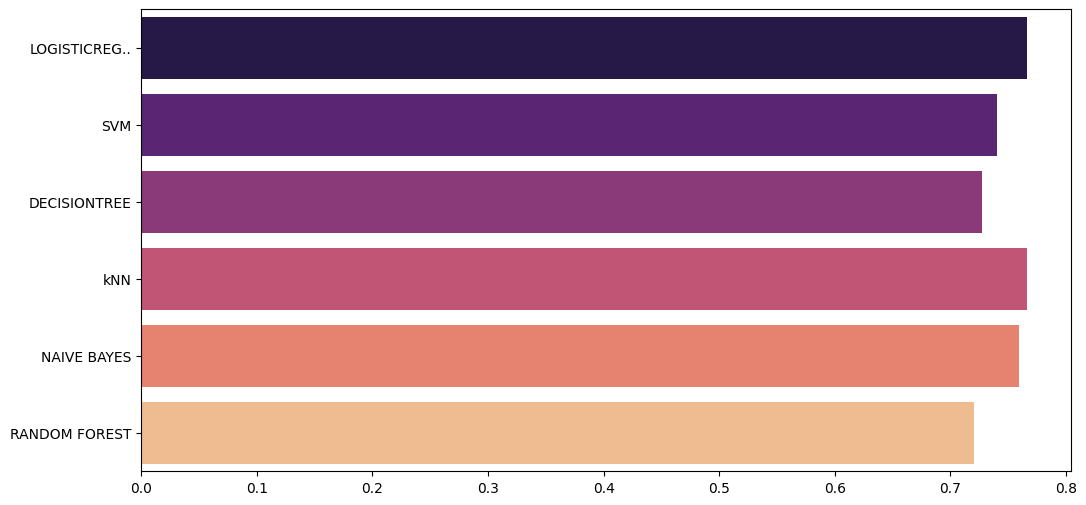

In [27]:
# ploting graph to compare accuracy of diffrent models 
plt.figure(figsize=(12,6))

model_acc = [logistic_acc,svm_acc,decision_tree_acc,knn_acc,naive_bayes_acc,random_forest_acc]
model_name = ['LOGISTICREG..','SVM','DECISIONTREE','kNN','NAIVE BAYES','RANDOM FOREST']

sns.barplot(x=model_acc, y=model_name,palette='magma')

### 